# Point Processing


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cv2.__version__

'4.6.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


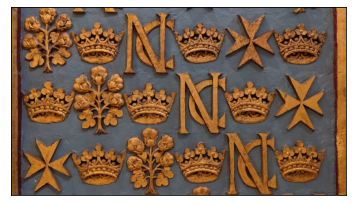

In [ ]:
path = "/content/drive/MyDrive/ColabNotebooks/Principles of CV for AI/img/sjcmotif.jpg"
r = cv2.imread(path,1)
#try replacing the 1 with 0 above to see the greyscale effect.

r = cv2.cvtColor(r, cv2.COLOR_BGR2RGB)

#xticks and yticks can be assigned an empty list so that the image is presented without axis.
plt.xticks([])
plt.yticks([])
plt.imshow(r)

##Splitting Channels

r is a NumPy array representing `an input color image in the BGR color space. The purpose of the code is to split the input color image into its three color channels: blue, green, and red.

*  cv2.split(r) is a function provided by OpenCV that takes a color image as input and returns a tuple of its three color channels in the order blue, green, and red.

* The tuple is then unpacked using tuple unpacking syntax into three variables channel_b, channel_g, and channel_r, which will contain the blue, green, and red color channels, respectively.

After this code is executed, the variables channel_b, channel_g, and channel_r will each contain a 2D NumPy array representing the corresponding color channel of the input color image r. These color channels can be processed independently or combined back together to form a color image using the cv2.merge() function.

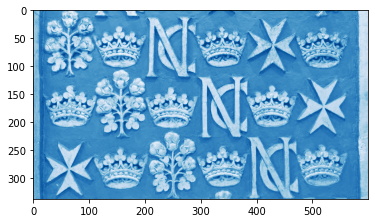

In [ ]:
(channel_b, channel_g, channel_r) = cv2.split(r)
plt.imshow(channel_b, cmap=plt.cm.Blues_r)

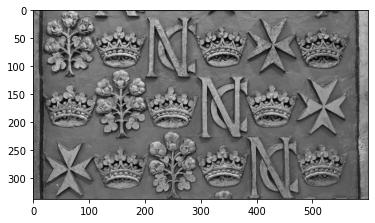

In [ ]:
r = cv2.imread(path,0)
plt.imshow(r, cmap="gray")

## Point-Processing Transforms

Three of the common Intensity transformations are:
- Linear (negative / identity)
- Logarithmic (log / inverse log)
- Power law (nth power / nth root)


### Linear Transform

r is a NumPy array representing an input image. The purpose of the code is to perform image negative transformation, which is a common technique used in image processing to invert the intensity values of an image.

*  `intensity` is a constant value set to 255.0, which is the maximum value that a pixel can have in an 8-bit grayscale image.

*  `s` is a NumPy array of the same shape as the input image r that will store the result of the image negative transformation.

*  `intensity - r` subtracts the intensity values of each pixel in the input image r from the constant intensity. This effectively inverts the intensity values of the image, so that darker regions become brighter and brighter regions become darker.

After this code is executed, the variable s will contain the result of the image negative transformation of the input image r.

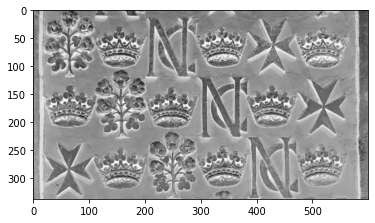

In [ ]:
intensity = 255.0
s = intensity - r

plt.imshow(s, cmap="gray")

`cv2.bitwise_not()` is a function provided by OpenCV that takes an input image as argument and returns its bitwise NOT. Bitwise NOT operation inverts the bits of each pixel value in the image, which effectively inverts the intensity values of the image.

This is the equivalent of the code block above.

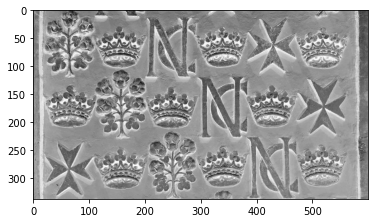

In [ ]:
s = cv2.bitwise_not(r)
plt.imshow(s, cmap="gray")

### Logarithmic Transform

The purpose of the code is to perform logarithmic image scaling, which is a common technique used in image processing to enhance the visibility of details in darker regions of an image. The formula used in the code applies a logarithmic transformation to the pixel values in the input image r, scales the resulting values to the range [0, 255], and stores the result in the variable img_log.

*   np.log(r + 1) applies a natural logarithm to the pixel values in the input image after adding 1 to each value. This is done to avoid taking the logarithm of zero, which is undefined.

*   np.log(1 + np.max(r)) calculates the logarithm of 1 plus the maximum pixel value in the input image r. This is used to scale the values in the input image to the range [0, 1] before they are transformed.

*   (np.log(r + 1) / np.log(1 + np.max(r))) divides the transformed pixel values by the scaling factor calculated in the previous step to ensure that the transformed values are in the range [0, 1].

*   255 scales the values in the range [0, 1] to the range [0, 255] for display purposes.

*   The resulting image is stored in the variable img_log.

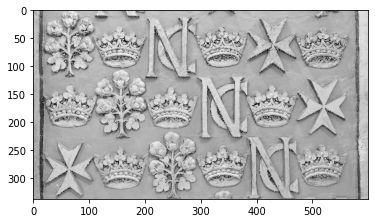

In [ ]:
img_log = (np.log(r +1)/(np.log(1+np.max( r ))))*255
c = 2

s = np.array(img_log * c ,dtype=np.uint8)

plt.imshow(s, cmap="gray")


### Power Transform

r is assumed to be a NumPy array representing an input image. The purpose of the code is to perform gamma correction on the input image, which is a common technique used in image processing to adjust the brightness and contrast of an image.

Here is a breakdown of the code:

*  `gamma` is a constant value set to 1.2, which represents the gamma value to be used for the gamma correction.

*  `r/255` divides each pixel value in the input image r by 255 to normalize the pixel values to the range [0, 1].

*  `(r/255)**gamma` applies the gamma correction to the normalized pixel values using the formula (r/255)**gamma, where gamma is the constant value defined above.

*  `255*(r/255)**gamma `scales the corrected pixel values back to the range [0, 255] to ensure that the output values are within the valid range for an 8-bit image.

*  `np.array(..., dtype='uint8')` converts the resulting NumPy array of corrected pixel values to an unsigned 8-bit integer data type, which is the data type used for grayscale images in OpenCV.

The resulting NumPy array is stored in the variable s.
After this code is executed, the variable s will contain the result of the gamma correction applied to the input image r.

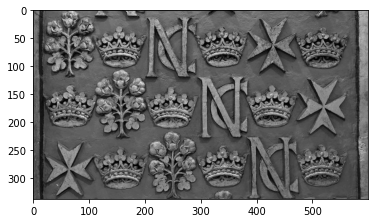

In [ ]:
gamma = 1.2
s= np.array(255*(r/255)**gamma,dtype='uint8')

plt.imshow(s, cmap="gray")

## Thresholding

This example applies Otsu thresholding to the image using the `cv2.threshold()` function with the `cv2.THRESH_OTSU` flags. It calculates the optimal threshold value using the Otsu algorithm and applies it to the input image s, creating a binary image where all pixels with values above the threshold are set to 255 (white), and all pixels with values below the threshold are set to 0 (black).

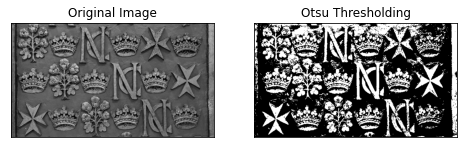

In [ ]:
ret, thresh = cv2.threshold(s, 0, 255, cv2.THRESH_OTSU)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Display the original and thresholded images in the subplots
axs[0].imshow(s, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(thresh, cmap='gray')
axs[1].set_title('Otsu Thresholding')
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

End of Notebook.

Dylan Seychell, 2023

dylan.seychell@um.edu.mt